In [1]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable inline plotting for Jupyter
%matplotlib inline

In [2]:
# 2. Load the Dataset
df = pd.read_csv('Titanic-dataset.csv') 

# Create a copy to preserve the original data
df_cleaned = df.copy()

In [3]:
# 3. Initial Data Inspection

print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

Dataset Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary Statistics:
         PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000 

In [4]:
# 4. Handling Missing Values

# Age – Fill with median
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Cabin – Fill with 'Unknown' since it's a categorical string
df_cleaned['Cabin'].fillna('Unknown', inplace=True)

# Embarked – Fill with most frequent value
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

# Re-check missing values
print("\nAfter Cleaning - Missing Values:\n", df_cleaned.isnull().sum())


After Cleaning - Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_2708\246365953.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2708\246365953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

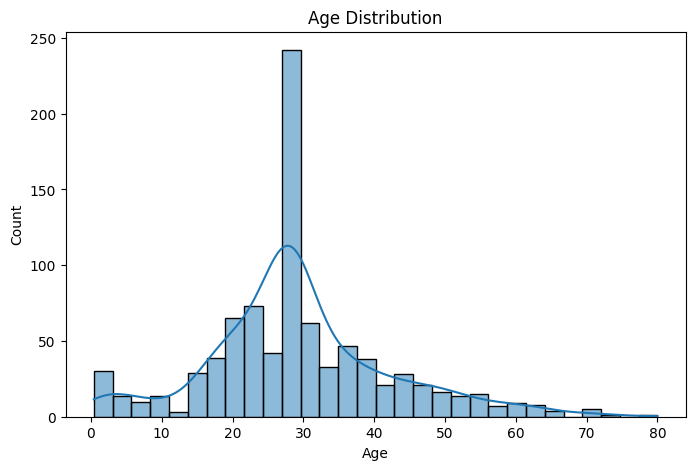

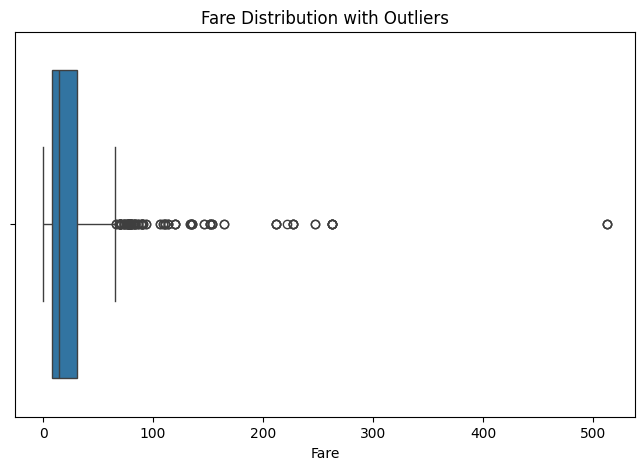

In [5]:
# 5. Univariate Analysis


# Histogram: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot: Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

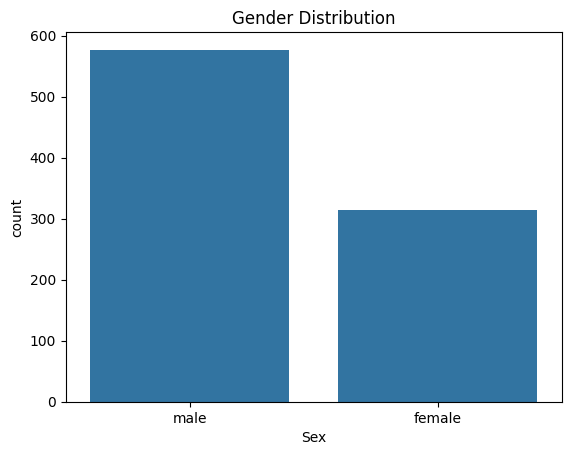

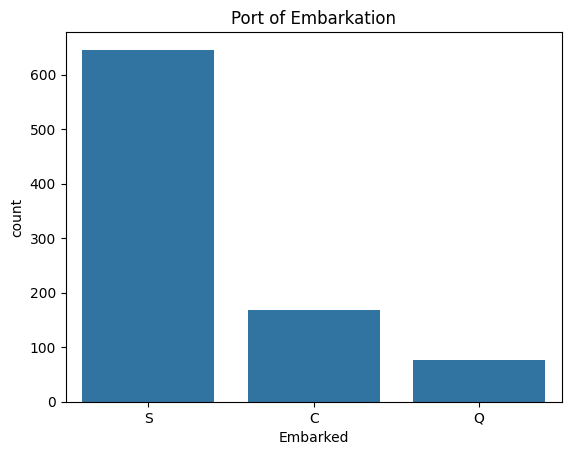

In [6]:
# 6. Categorical Feature Counts

# Gender Count
sns.countplot(data=df_cleaned, x='Sex')
plt.title('Gender Distribution')
plt.show()

# Embarked Port Count
sns.countplot(data=df_cleaned, x='Embarked')
plt.title('Port of Embarkation')
plt.show()

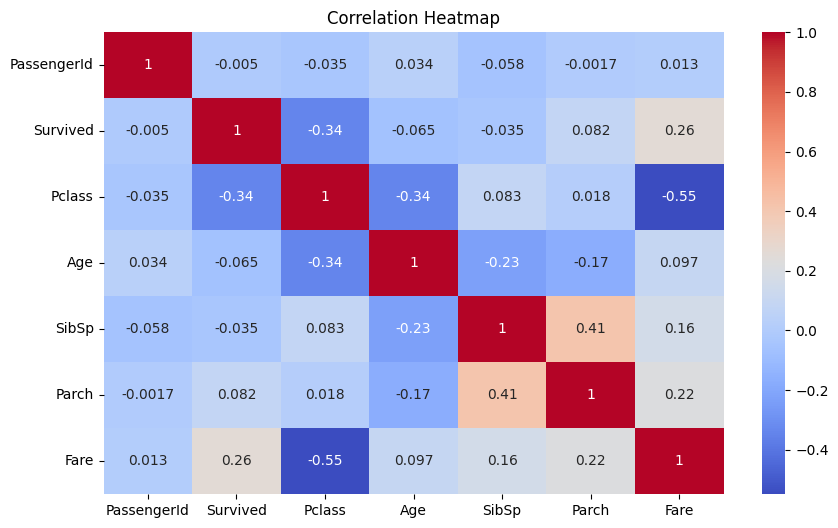

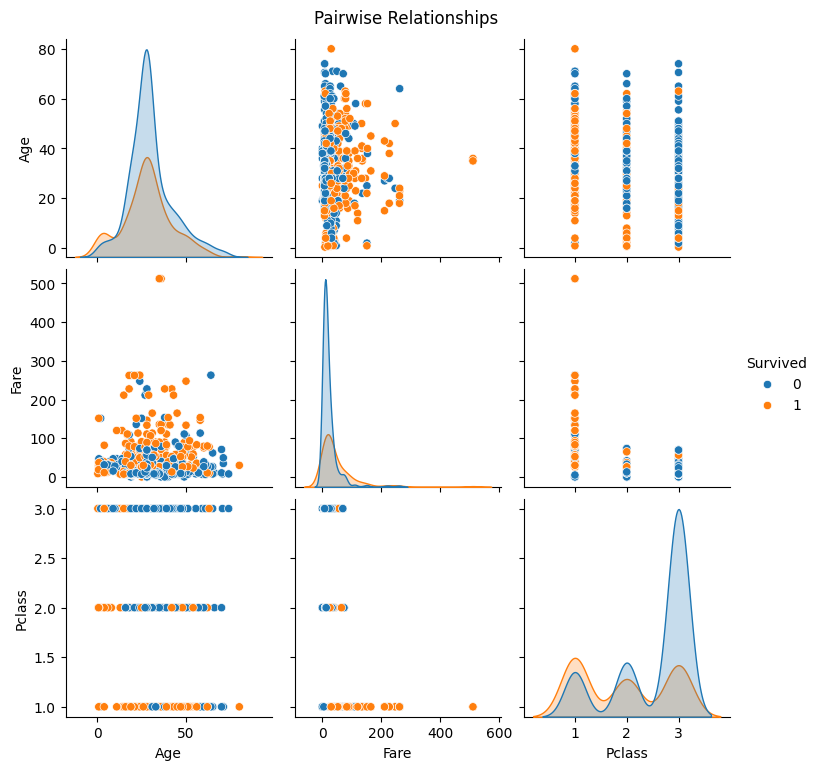

In [7]:
# 7. Correlation and Pairwise Analysis

# Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected numeric features
sns.pairplot(df_cleaned[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [8]:
# 8. Interactive Visualization

# Interactive Plot: Age vs Fare colored by Survival
fig = px.scatter(df_cleaned, x='Age', y='Fare', color='Survived', title='Age vs Fare (Colored by Survival)')
fig.show()

In [9]:
# 9. Feature-Level Observations

# Skewed Fare – Consider log transformation (optional for modeling)
df_cleaned['LogFare'] = np.log1p(df_cleaned['Fare'])

# Highly correlated features (e.g., SibSp + Parch) could be combined
df_cleaned['FamilySize'] = df_cleaned['SibSp'] + df_cleaned['Parch']

In [10]:
# 10. Save the Cleaned Dataset

df_cleaned.to_csv('titanic_cleaned.csv', index=False)
print(" Cleaned dataset saved as 'titanic_cleaned.csv'")

 Cleaned dataset saved as 'titanic_cleaned.csv'
